In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=a3e9fc3fbdcc70cb4e90ad02371b9f179c8c33aa3eac96e36b49d8dfa5f831fc
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Kemiripan antara dua wajah adalah: 41.5005545092162 %


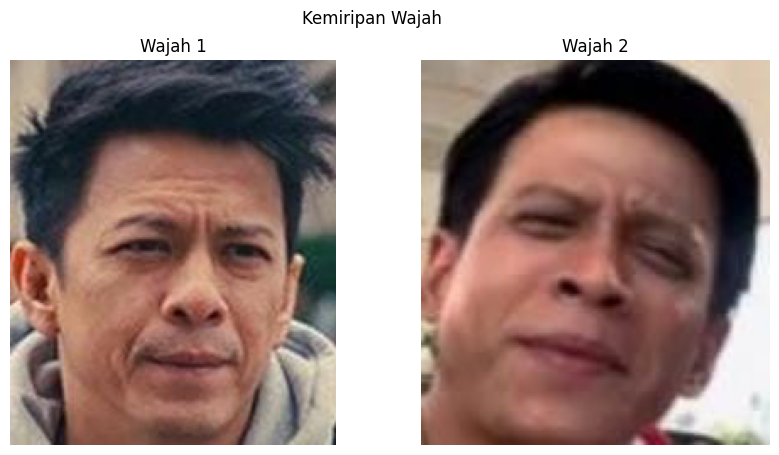

In [5]:
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

def hitung_kemiripan_wajah(foto_1, foto_2):
    # Menggunakan library face_recognition untuk memuat gambar dan mengenali wajah
    gambar_1 = face_recognition.load_image_file(foto_1)
    gambar_2 = face_recognition.load_image_file(foto_2)

    # Mengambil lokasi wajah pada gambar
    wajah_1 = face_recognition.face_locations(gambar_1)
    wajah_2 = face_recognition.face_locations(gambar_2)

    # Menghasilkan encoding (vektor fitur) untuk setiap wajah
    encoding_1 = face_recognition.face_encodings(gambar_1, wajah_1)
    encoding_2 = face_recognition.face_encodings(gambar_2, wajah_2)

    if len(encoding_1) == 0 or len(encoding_2) == 0:
        # Jika tidak ada wajah yang terdeteksi pada salah satu gambar
        return 0.0

    # Mengkonversi daftar vektor fitur menjadi array NumPy
    encoding_1 = np.array(encoding_1)
    encoding_2 = np.array(encoding_2)

    # Menghitung kemiripan menggunakan metode euclidean distance
    kemiripan = np.linalg.norm(encoding_1 - encoding_2, axis=1)

    # Mengembalikan nilai kemiripan antara 0 dan 1 (semakin dekat ke 0, semakin mirip)
    return 1 - kemiripan[0]

# Contoh penggunaan
foto_1 = "ariel.jpg"
foto_2 = "ariel_kw1.jpg"

kemiripan = hitung_kemiripan_wajah(foto_1, foto_2)
print("Kemiripan antara dua wajah adalah:", kemiripan*100, "%")

# Memuat gambar dan menampilkan kemiripan wajah
gambar_1 = plt.imread(foto_1)
gambar_2 = plt.imread(foto_2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gambar_1)
ax[0].axis('off')
ax[0].set_title('Wajah 1')

ax[1].imshow(gambar_2)
ax[1].axis('off')
ax[1].set_title('Wajah 2')

plt.suptitle('Kemiripan Wajah')
plt.show()
